<a href="https://colab.research.google.com/github/rusetskiy1974/Data-Sciens/blob/main/HW11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install keras --upgrade tensorflow --upgrade

In [2]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Dense, Bidirectional, Embedding
# from keras.layers import Embedding, SimpleRNN, Dense

In [3]:
max_features = 10000  # кількість слів, що розглядаються як особливості
max_len = 500  # обмеження кількості слів в тексті
batch_size = 32


In [4]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів


In [6]:
x_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [7]:
x_train.shape

(25000, 500)

In [8]:
from tqdm.keras import TqdmCallback

# Функція для створення та навчання моделі
def create_and_train_model(rnn_type, units, bidirectional, num_layers, x_train, y_train, x_test, y_test, epochs=5):
    model = Sequential()
    model.add(Embedding(max_features, 128))

    for i in range(num_layers):
        return_sequences = (i < num_layers - 1)  # Повертаємо послідовність для всіх шарів, крім останнього
        if bidirectional:
            model.add(Bidirectional(rnn_type(units, return_sequences=return_sequences)))
        else:
            model.add(rnn_type(units, return_sequences=return_sequences))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    print(rnn_type.__name__, f"Bidirectional={bidirectional}", 'layers:', num_layers, 'units:', units)
    model.fit(x_train, y_train, epochs=epochs, batch_size=32, verbose=0, callbacks=[TqdmCallback(verbose=0)])

    train_acc = model.evaluate(x_train, y_train, verbose=0)[1]
    test_acc = model.evaluate(x_test, y_test, verbose=0)[1]

    train_predict = model.predict(x_train, verbose=0)
    test_predict = model.predict(x_test, verbose=0)

    return train_acc, test_acc, train_predict, test_predict

In [9]:
# Виконання експериментів
results_dict = {}
rnn_types = [SimpleRNN, LSTM]
units_list = [4, 8, 16]
bidirectional_options = [True, False]
num_layers_list = [1, 2, 3]  # Додаємо кількість шарів для створення більш глибшої будови

In [10]:
for bdr in bidirectional_options:
    for rnn_type in rnn_types:
        for units in units_list:
            for num_layers in num_layers_list:
                train_acc, test_acc, train_predict, test_predict = create_and_train_model(rnn_type, units, bdr, num_layers, x_train, y_train, x_test, y_test)

                rnn_name = rnn_type.__name__
                bdr_str = f"Bidirectional={bdr}"
                layer_str = f"Layers={num_layers}"

                if rnn_name not in results_dict:
                    results_dict[rnn_name] = {}

                if bdr_str not in results_dict[rnn_name]:
                    results_dict[rnn_name][bdr_str] = {}

                if layer_str not in results_dict[rnn_name][bdr_str]:
                    results_dict[rnn_name][bdr_str][layer_str] = {}

                results_dict[rnn_name][bdr_str][layer_str][units] = {
                    'train_acc': train_acc,
                    'test_acc': test_acc,
                    'train_predict': train_predict,
                    'test_predict': test_predict
                }


SimpleRNN Bidirectional=True layers: 1 units: 4


0epoch [00:00, ?epoch/s]

SimpleRNN Bidirectional=True layers: 2 units: 4


0epoch [00:00, ?epoch/s]

SimpleRNN Bidirectional=True layers: 3 units: 4


0epoch [00:00, ?epoch/s]

SimpleRNN Bidirectional=True layers: 1 units: 8


0epoch [00:00, ?epoch/s]

SimpleRNN Bidirectional=True layers: 2 units: 8


0epoch [00:00, ?epoch/s]

SimpleRNN Bidirectional=True layers: 3 units: 8


0epoch [00:00, ?epoch/s]

SimpleRNN Bidirectional=True layers: 1 units: 16


0epoch [00:00, ?epoch/s]

SimpleRNN Bidirectional=True layers: 2 units: 16


0epoch [00:00, ?epoch/s]

SimpleRNN Bidirectional=True layers: 3 units: 16


0epoch [00:00, ?epoch/s]

LSTM Bidirectional=True layers: 1 units: 4


0epoch [00:00, ?epoch/s]

LSTM Bidirectional=True layers: 2 units: 4


0epoch [00:00, ?epoch/s]

LSTM Bidirectional=True layers: 3 units: 4


0epoch [00:00, ?epoch/s]

LSTM Bidirectional=True layers: 1 units: 8


0epoch [00:00, ?epoch/s]

LSTM Bidirectional=True layers: 2 units: 8


0epoch [00:00, ?epoch/s]

LSTM Bidirectional=True layers: 3 units: 8


0epoch [00:00, ?epoch/s]

LSTM Bidirectional=True layers: 1 units: 16


0epoch [00:00, ?epoch/s]

LSTM Bidirectional=True layers: 2 units: 16


0epoch [00:00, ?epoch/s]

LSTM Bidirectional=True layers: 3 units: 16


0epoch [00:00, ?epoch/s]

SimpleRNN Bidirectional=False layers: 1 units: 4


0epoch [00:00, ?epoch/s]

SimpleRNN Bidirectional=False layers: 2 units: 4


0epoch [00:00, ?epoch/s]

SimpleRNN Bidirectional=False layers: 3 units: 4


0epoch [00:00, ?epoch/s]

SimpleRNN Bidirectional=False layers: 1 units: 8


0epoch [00:00, ?epoch/s]

SimpleRNN Bidirectional=False layers: 2 units: 8


0epoch [00:00, ?epoch/s]

SimpleRNN Bidirectional=False layers: 3 units: 8


0epoch [00:00, ?epoch/s]

SimpleRNN Bidirectional=False layers: 1 units: 16


0epoch [00:00, ?epoch/s]

SimpleRNN Bidirectional=False layers: 2 units: 16


0epoch [00:00, ?epoch/s]

SimpleRNN Bidirectional=False layers: 3 units: 16


0epoch [00:00, ?epoch/s]

LSTM Bidirectional=False layers: 1 units: 4


0epoch [00:00, ?epoch/s]

LSTM Bidirectional=False layers: 2 units: 4


0epoch [00:00, ?epoch/s]

LSTM Bidirectional=False layers: 3 units: 4


0epoch [00:00, ?epoch/s]

LSTM Bidirectional=False layers: 1 units: 8


0epoch [00:00, ?epoch/s]

LSTM Bidirectional=False layers: 2 units: 8


0epoch [00:00, ?epoch/s]

LSTM Bidirectional=False layers: 3 units: 8


0epoch [00:00, ?epoch/s]

LSTM Bidirectional=False layers: 1 units: 16


0epoch [00:00, ?epoch/s]

LSTM Bidirectional=False layers: 2 units: 16


0epoch [00:00, ?epoch/s]

LSTM Bidirectional=False layers: 3 units: 16


0epoch [00:00, ?epoch/s]

In [32]:
import pickle
import numpy as np # Import numpy
#Збереження results_dict в Pickle файл
with open('/content/drive/MyDrive/files/results_dict.pkl', 'wb') as file:
    pickle.dump(results_dict, file)

In [34]:
# Зчитування results_dict з Pickle файл
with open('/content/drive/MyDrive/files/results_dict.pkl', 'rb') as file:
    results_dict = pickle.load(file)

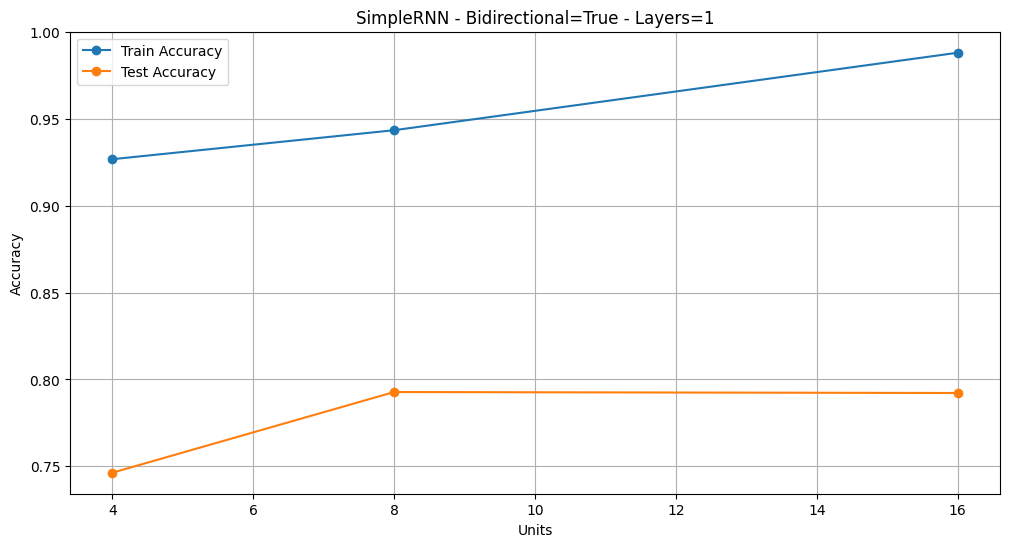

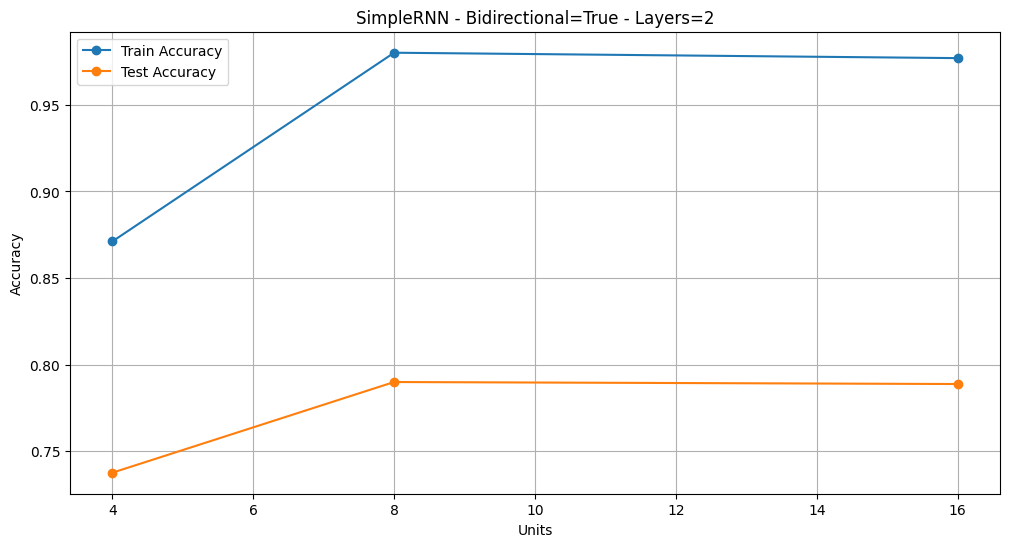

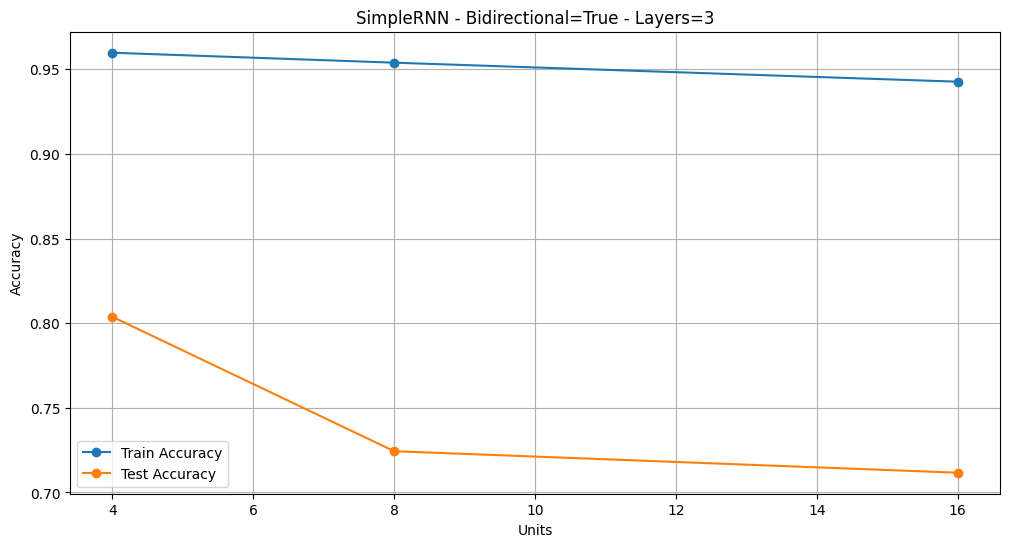

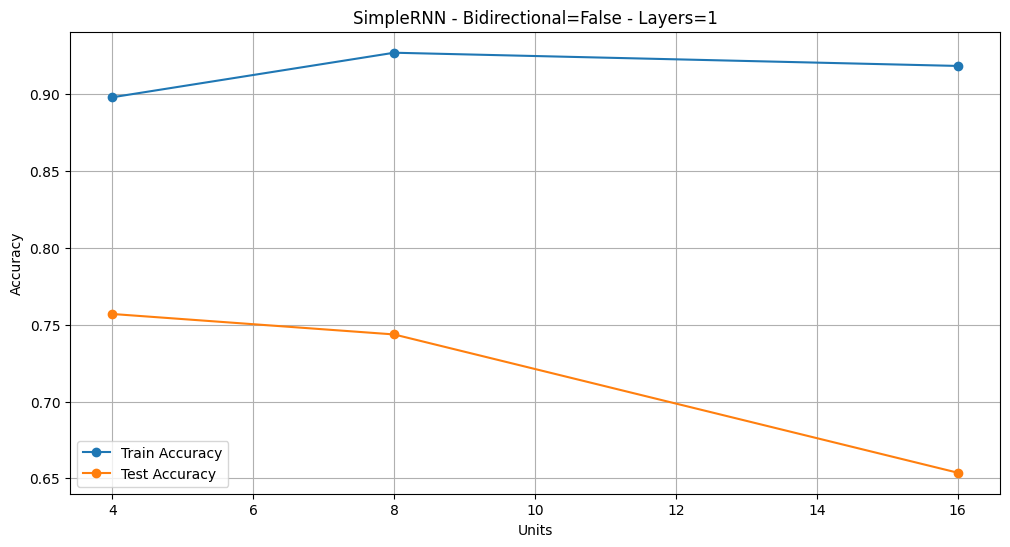

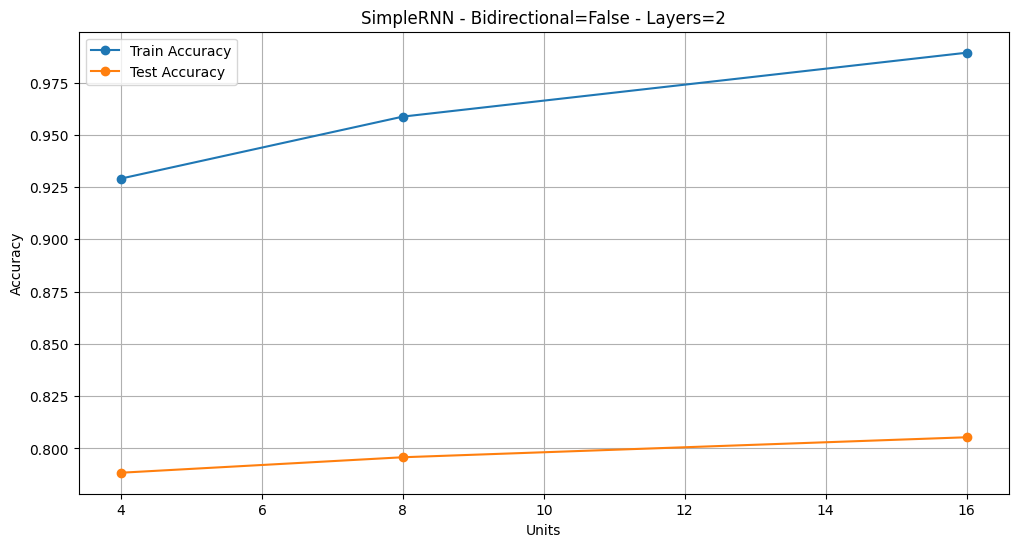

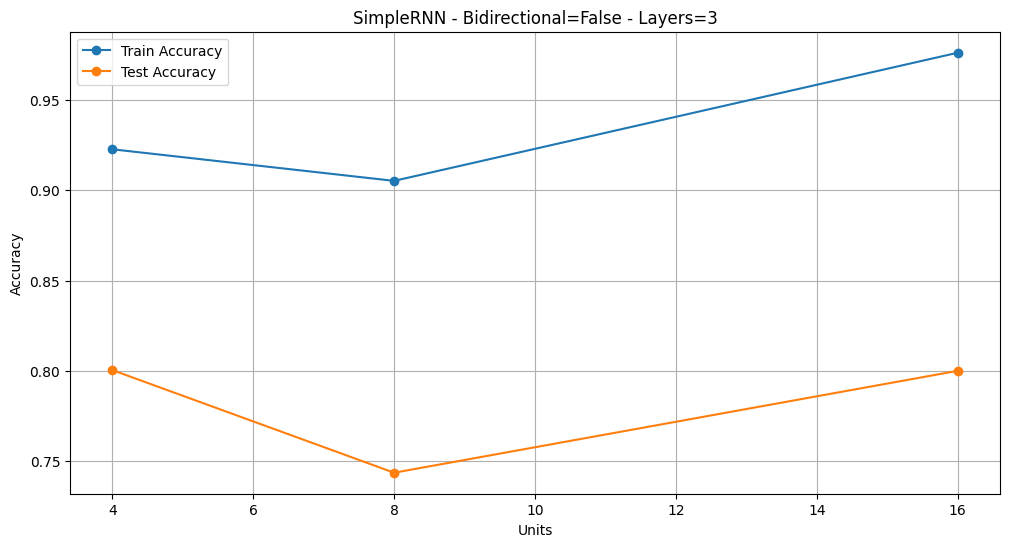

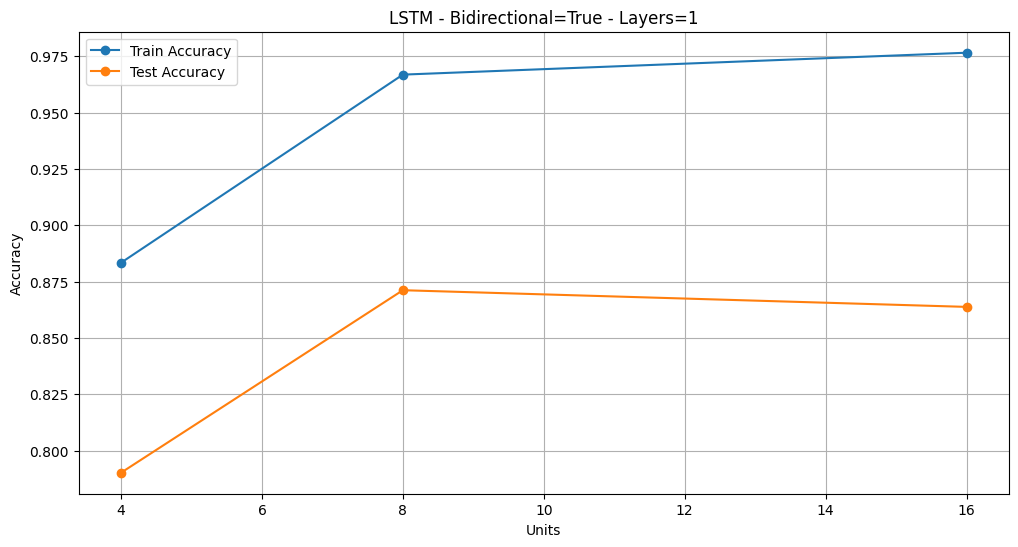

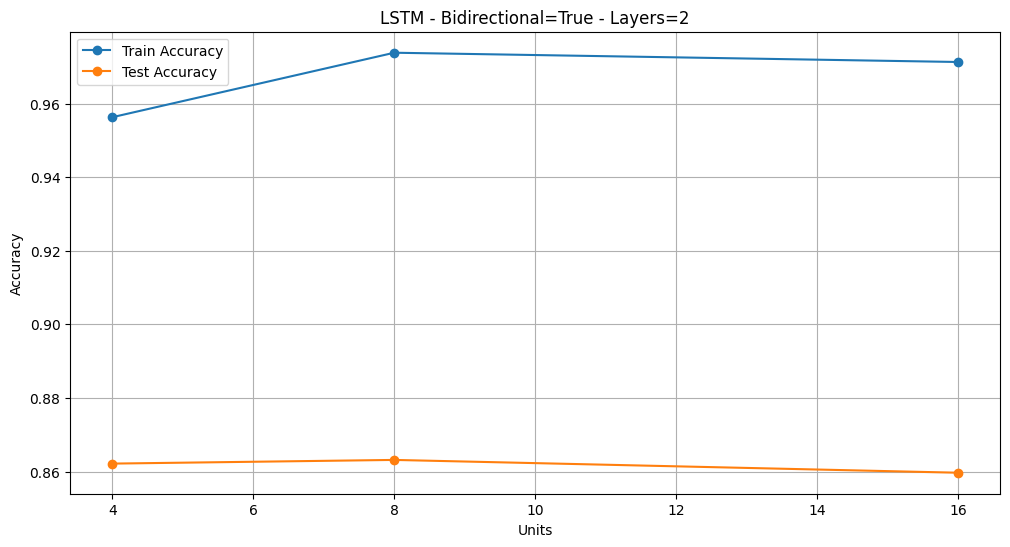

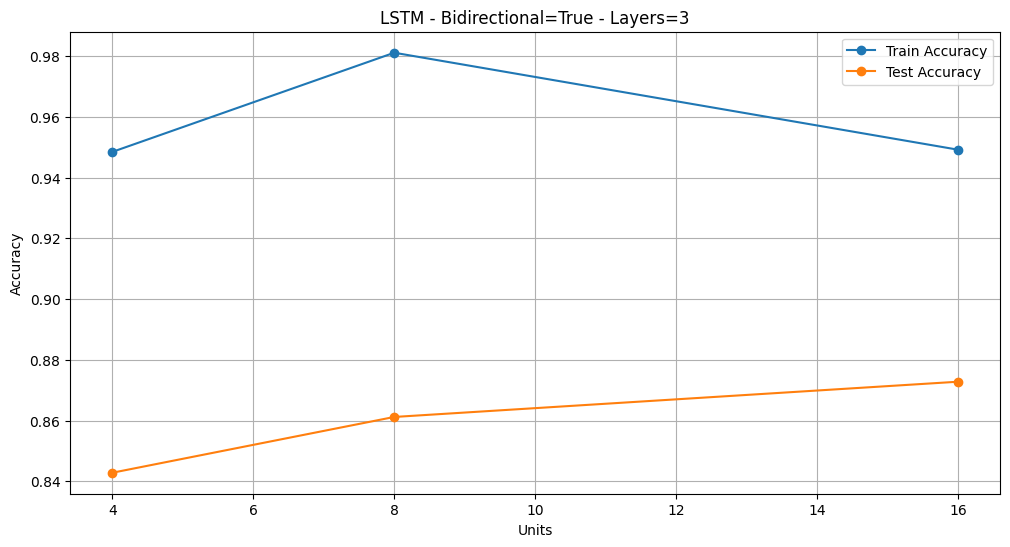

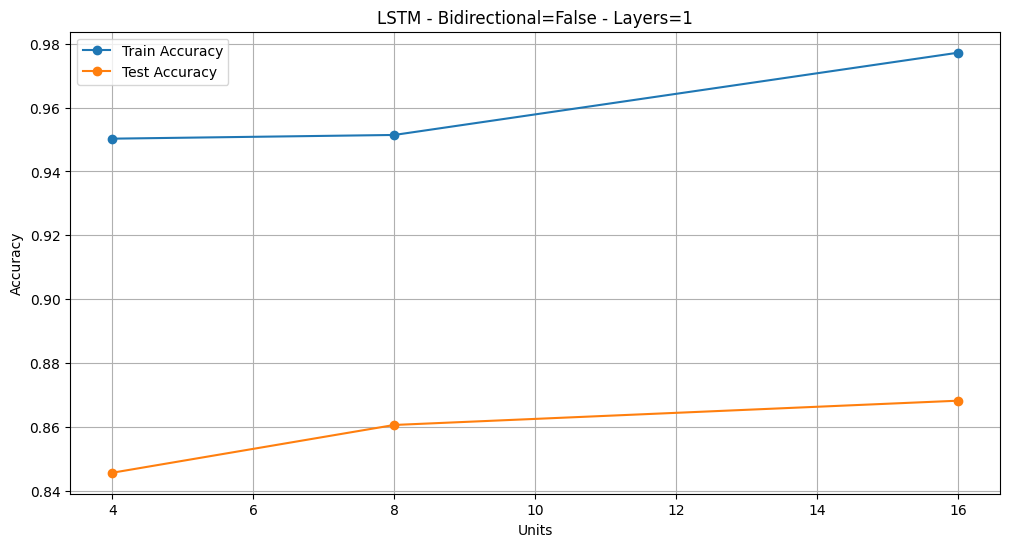

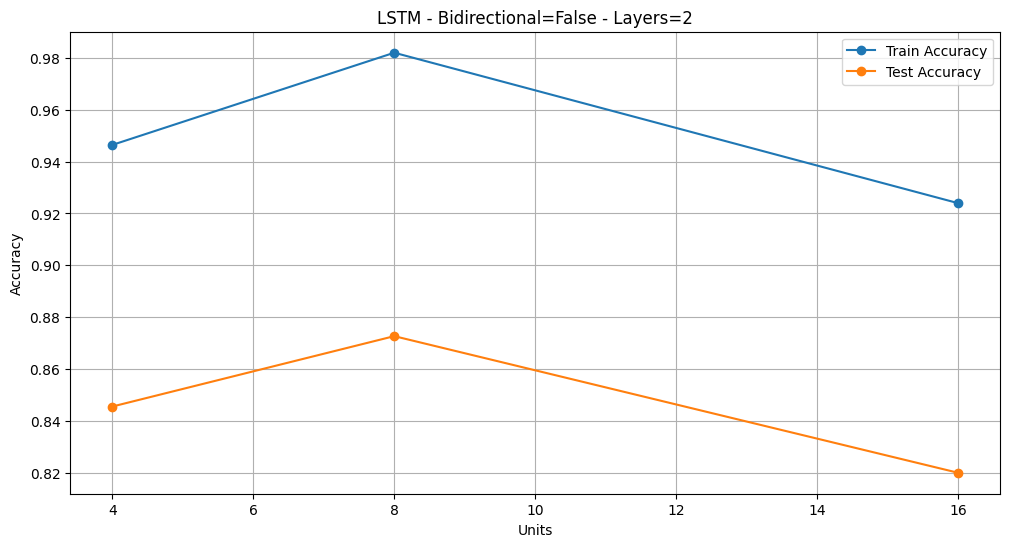

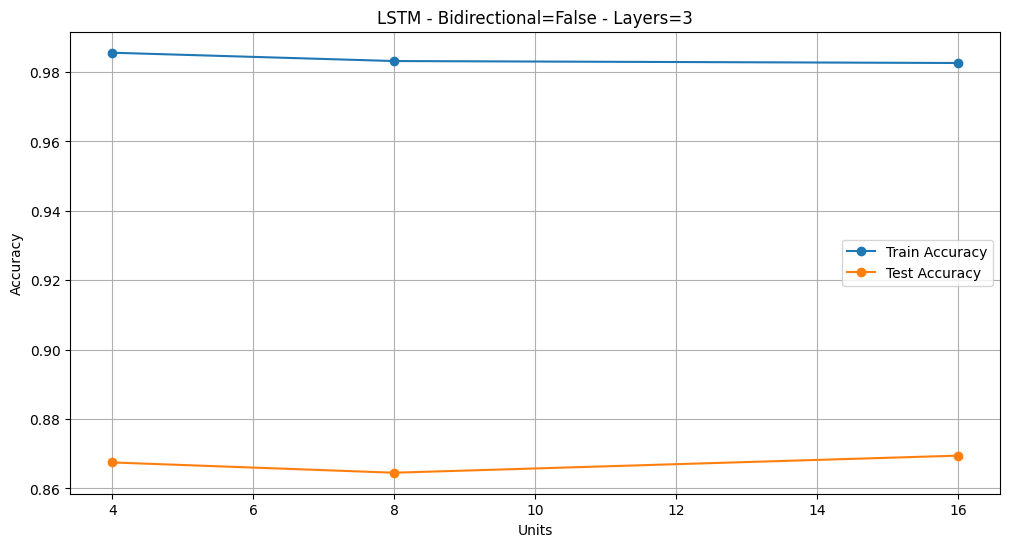

In [35]:
import matplotlib.pyplot as plt

# Візуалізація точності та передбачень
for rnn_name in results_dict:
    for bdr_str in results_dict[rnn_name]:
        for layer_str in results_dict[rnn_name][bdr_str]:
            train_accs = []
            test_accs = []
            unit_values = []
            for units in results_dict[rnn_name][bdr_str][layer_str]:
                train_accs.append(results_dict[rnn_name][bdr_str][layer_str][units]['train_acc'])
                test_accs.append(results_dict[rnn_name][bdr_str][layer_str][units]['test_acc'])
                unit_values.append(units)

            # Візуалізація точності
            plt.figure(figsize=(12, 6))
            plt.plot(unit_values, train_accs, label='Train Accuracy', marker='o')
            plt.plot(unit_values, test_accs, label='Test Accuracy', marker='o')
            plt.xlabel('Units')
            plt.ylabel('Accuracy')
            plt.title(f'{rnn_name} - {bdr_str} - {layer_str}')
            plt.legend()
            plt.grid(True)
            plt.show()



In [36]:
import numpy as np

# Функція для виведення прогнозованих і фактичних значень
def print_predictions_vs_actuals(results_dict, y_test, num_examples=10):
    for rnn_name in results_dict:
        for bdr_str in results_dict[rnn_name]:
            for layer_str in results_dict[rnn_name][bdr_str]:
                for units in results_dict[rnn_name][bdr_str][layer_str]:
                    # Отримання прогнозів
                    train_predict = np.array(results_dict[rnn_name][bdr_str][layer_str][units]['train_predict'])
                    test_predict = np.array(results_dict[rnn_name][bdr_str][layer_str][units]['test_predict'])

                    # Фактичні значення (замініть на ваші дані)
                    y_test = np.array(y_test)  # Можливо, потрібно визначити y_test глобально або передати як аргумент

                    print(f'\n{rnn_name} - {bdr_str} - {layer_str} - Units={units}')

                    # Виведення прогнозів та фактичних значень для тестового набору
                    print('Тестові дані:')
                    for i in range(min(num_examples, len(test_predict))):
                        print(f"Прогнозоване: {test_predict[i][0]:.4f}, Фактичне: {y_test[i]:.4f}")

                    # Виведення прогнозів та фактичних значень для тренувального набору (опціонально)
                    print('Тренувальні дані:')
                    for i in range(min(num_examples, len(train_predict))):
                        print(f"Прогнозоване: {train_predict[i][0]:.4f}, Фактичне: {y_train[i]:.4f}")

# Виклик функції для виведення результатів
print_predictions_vs_actuals(results_dict, y_test)


SimpleRNN - Bidirectional=True - Layers=1 - Units=4
Тестові дані:
Прогнозоване: 0.0367, Фактичне: 0.0000
Прогнозоване: 0.9842, Фактичне: 1.0000
Прогнозоване: 0.0203, Фактичне: 1.0000
Прогнозоване: 0.8372, Фактичне: 0.0000
Прогнозоване: 0.9514, Фактичне: 1.0000
Прогнозоване: 0.1382, Фактичне: 1.0000
Прогнозоване: 0.5145, Фактичне: 1.0000
Прогнозоване: 0.0177, Фактичне: 0.0000
Прогнозоване: 0.2804, Фактичне: 0.0000
Прогнозоване: 0.7551, Фактичне: 1.0000
Тренувальні дані:
Прогнозоване: 0.9340, Фактичне: 1.0000
Прогнозоване: 0.0337, Фактичне: 0.0000
Прогнозоване: 0.1689, Фактичне: 0.0000
Прогнозоване: 0.9556, Фактичне: 1.0000
Прогнозоване: 0.2738, Фактичне: 0.0000
Прогнозоване: 0.9469, Фактичне: 0.0000
Прогнозоване: 0.9605, Фактичне: 1.0000
Прогнозоване: 0.0025, Фактичне: 0.0000
Прогнозоване: 0.9721, Фактичне: 1.0000
Прогнозоване: 0.0811, Фактичне: 0.0000

SimpleRNN - Bidirectional=True - Layers=1 - Units=8
Тестові дані:
Прогнозоване: 0.0722, Фактичне: 0.0000
Прогнозоване: 0.9883, Фактичн

In [24]:
# Функція для створення нових вхідних даних
def create_new_input_data(num_samples, input_shape):
    return np.random.rand(num_samples, *input_shape)

In [25]:
# Розрахунок передбачень для нових вхідних даних
new_input_data = create_new_input_data(10, (10, 1))  # 10 нових зразків з формою (10, 1)

predictions_dict = {}

for rnn_name in results_dict:
    for bdr_str in results_dict[rnn_name]:
        for layer_str in results_dict[rnn_name][bdr_str]:
            for units in results_dict[rnn_name][bdr_str][layer_str]:
                model = results_dict[rnn_name][bdr_str][layer_str][units]['model']
                new_predictions = model.predict(new_input_data, verbose=0)

                if rnn_name not in predictions_dict:
                    predictions_dict[rnn_name] = {}

                if bdr_str not in predictions_dict[rnn_name]:
                    predictions_dict[rnn_name][bdr_str] = {}

                if layer_str not in predictions_dict[rnn_name][bdr_str]:
                    predictions_dict[rnn_name][bdr_str][layer_str] = {}

                predictions_dict[rnn_name][bdr_str][layer_str][units] = new_predictions.tolist()

# Виведення результатів передбачень
for rnn_name in predictions_dict:
    for bdr_str in predictions_dict[rnn_name]:
        for layer_str in predictions_dict[rnn_name][bdr_str]:
            for units in predictions_dict[rnn_name][bdr_str][layer_str]:
                print(f'{rnn_name} - {bdr_str} - {layer_str} - Units={units}')
                print(predictions_dict[rnn_name][bdr_str][layer_str][units])
                print()

KeyError: 'model'